Click this button to run in Colab.
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/deep_learning_from_scratch_3/blob/master/ch02/word2vec.ipynb)

In [1]:
# some helper functions for Colab
def is_colab():
    try:
        import google.colab
        return True
    except ImportError:
        return False
    
if is_colab():
    !git clone --filter=blob:none --sparse https://github.com/ssuai/deep_learning_from_scratch_2.git
    %cd deep_learning_from_scratch_2
    !git sparse-checkout set dataset common
else:        
    import sys
    import os
#     sys.path.append('..')
    sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정

## 3.2.1 CBOW 모델의 추론 처리
![그림 3-11](./fig_3-11.png)

In [2]:
# %load cbow_predict.py
import numpy as np
from common.layers import MatMul


# 샘플 맥락 데이터
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]])
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]])

# 가중치 초기화
W_in = np.random.randn(7, 3)
W_out = np.random.randn(3, 7)

# 계층 생성
in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

# 순전파
h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)
print(s)

[[ 1.04516396  0.7747216   0.49159258 -0.73121757 -0.09413108  0.01672298
   1.87325692]]


## 3.4 CBOW 모델 구현
![그림 3-19](./fig_3-19.png)
![그림 3-20](./fig_3-20.png)

In [3]:
# %load simple_cbow.py

import numpy as np
# import sys
# sys.path.append('..')
from common.layers import MatMul, SoftmaxWithLoss


class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

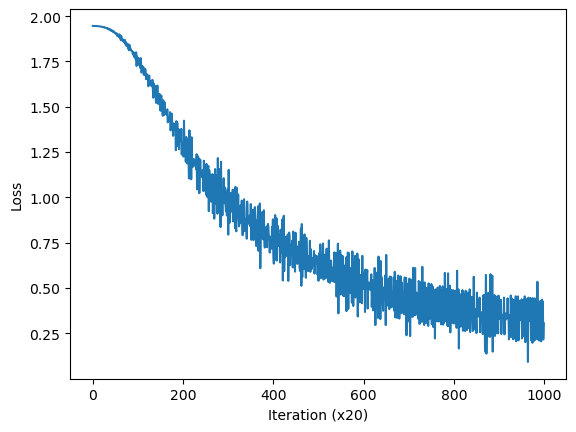

In [4]:
# %load train.py
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
# from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [5]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.0738269  -1.7094485  -1.1354436   1.0739143   0.95917654]
say [-1.2933939  -0.9817342  -0.9606923  -1.3636472  -0.33552644]
goodbye [ 1.0215374  0.8610743 -0.7307421  1.0535723  0.8722065]
and [-1.3097456  -0.806155    0.15010002 -1.3012853   2.0741012 ]
i [ 1.0312308   0.84175235 -0.7447611   1.0524359   0.8867142 ]
hello [ 1.0633775  -1.7011361  -1.1212636   1.0630013   0.95655805]
. [-0.7115785  -0.87801605 -1.4326531  -0.8941168  -1.6450698 ]


In [6]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [7]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['you']]  # "you"의 단어 벡터
c1 = word_vecs[word_to_id['i']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

0.44527572


## 3.5.2 skip-gram 모델
![그림 3-24](fig_3-24.png)

In [8]:
# %load simple_skip_gram.py
import numpy as np
# import sys
# sys.path.append('..')
from common.layers import MatMul, SoftmaxWithLoss


class SimpleSkipGram:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        l1 = self.loss_layer1.forward(s, contexts[:, 0])
        l2 = self.loss_layer2.forward(s, contexts[:, 1])
        loss = l1 + l2
        return loss

    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None


## Train again with skip-gram

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 26 |

| 에폭 277 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 278 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 279 |  반복 1 / 2 | 시간 0[s] | 손실 2.61
| 에폭 280 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 281 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 282 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 283 |  반복 1 / 2 | 시간 0[s] | 손실 2.36
| 에폭 284 |  반복 1 / 2 | 시간 0[s] | 손실 2.30
| 에폭 285 |  반복 1 / 2 | 시간 0[s] | 손실 2.48
| 에폭 286 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 287 |  반복 1 / 2 | 시간 0[s] | 손실 2.18
| 에폭 288 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 289 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 290 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 291 |  반복 1 / 2 | 시간 0[s] | 손실 2.40
| 에폭 292 |  반복 1 / 2 | 시간 0[s] | 손실 2.22
| 에폭 293 |  반복 1 / 2 | 시간 0[s] | 손실 2.38
| 에폭 294 |  반복 1 / 2 | 시간 0[s] | 손실 2.21
| 에폭 295 |  반복 1 / 2 | 시간 0[s] | 손실 2.39
| 에폭 296 |  반복 1 / 2 | 시간 0[s] | 손실 2.44
| 에폭 297 |  반복 1 / 2 | 시간 0[s] | 손실 2.32
| 에폭 298 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 299 |  반복 1 / 2 | 시간 0[s] | 손실 2.31
| 에폭 300 |  반복 1 / 2 | 시간 0[s] | 손실 2.43
| 에폭 301 |  반복 1

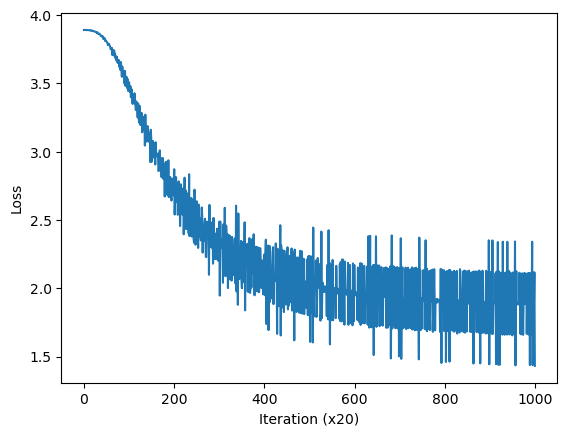

In [9]:
# %load train.py
# import sys
# sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from common.trainer import Trainer
from common.optimizer import Adam
# from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot


window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleSkipGram(vocab_size, hidden_size)
#model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [10]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [-0.00505876  0.00734964  0.00607414  0.00753899 -0.01023912]
say [ 1.0208621  -1.0496752  -0.8426952   0.8689328  -0.87976265]
goodbye [-0.81183434  1.0976954   0.79145366 -0.7683172   0.7814256 ]
and [ 0.8889003   1.3959886  -1.0047686   0.95750046 -0.978935  ]
i [-0.8120849   1.0965881   0.80396026 -0.7609729   0.7689582 ]
hello [-0.95047206 -1.4536912   0.8860107  -0.90793455  0.90765345]
. [ 0.01562549 -0.00038429 -0.01617234 -0.01075819 -0.00421858]


In [11]:
from common.util import cos_similarity

c0 = word_vecs[word_to_id['you']]  # "you"의 단어 벡터
c1 = word_vecs[word_to_id['i']]    # "i"의 단어 벡터
print(cos_similarity(c0, c1))

0.10755339
